In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
tabular_data=pd.read_csv("/kaggle/input/tabular-playground-series-jul-2022/data.csv")
tabular_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
tabular_data.shape

(98000, 30)

In [4]:
tabular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [5]:
tabular_data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [6]:
tabular_data.isna().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [7]:
len(tabular_data['id'].unique())


98000

In [8]:
len(tabular_data['f_01'].unique())

98000

In [9]:
len(tabular_data['f_00'].unique())

98000

In [10]:
len(tabular_data['f_02'].unique())

98000

In [11]:
len(tabular_data['f_03'].unique())

98000

In [12]:
len(tabular_data['f_04'].unique())

98000

In [13]:
len(tabular_data['f_05'].unique())

98000

In [14]:
len(tabular_data['f_06'].unique())

98000

In [15]:
len(tabular_data['f_07'].unique())

32

In [16]:
len(tabular_data['f_08'].unique())

29

In [17]:
len(tabular_data['f_09'].unique())

45

In [18]:
len(tabular_data['f_10'].unique())

37

In [19]:
len(tabular_data['f_11'].unique())

29

In [20]:
len(tabular_data['f_12'].unique())

39

In [21]:
len(tabular_data['f_13'].unique())

30

In [22]:
len(tabular_data['f_14'].unique())

98000

In [23]:
len(tabular_data['f_15'].unique())

98000

In [24]:
len(tabular_data['f_16'].unique())

98000

In [25]:
len(tabular_data['f_17'].unique())

98000

In [26]:
len(tabular_data['f_18'].unique())

98000

In [27]:
len(tabular_data['f_19'].unique())

98000

In [28]:
len(tabular_data['f_20'].unique())

98000

In [29]:
len(tabular_data['f_21'].unique())

98000

In [30]:
len(tabular_data['f_22'].unique())

98000

In [31]:
len(tabular_data['f_23'].unique())

98000

In [32]:
len(tabular_data['f_24'].unique())

98000

In [33]:
len(tabular_data['f_25'].unique())

98000

In [34]:
len(tabular_data['f_26'].unique())

98000

In [35]:
len(tabular_data['f_27'].unique())

98000

In [36]:
len(tabular_data['f_28'].unique())

98000

In [37]:
corr=tabular_data.corr()
corr

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,1.000000,0.002856,-0.005167,0.001404,0.002268,-0.001201,-0.001297,0.001249,-0.003181,0.001774,...,-0.001869,0.001981,-0.003020,0.001247,0.000065,0.001376,-0.003301,0.001145,0.004146,0.000309
f_00,0.002856,1.000000,-0.001955,0.002660,0.000105,0.008797,0.003817,0.002903,-0.003847,-0.000866,...,0.000437,0.002687,-0.000447,0.004087,-0.003756,0.001088,0.006216,0.000615,0.003888,0.001103
f_01,-0.005167,-0.001955,1.000000,0.001402,-0.001698,-0.001727,-0.001444,0.001826,0.006539,0.001023,...,-0.001402,-0.001852,0.001099,-0.002965,0.001760,-0.005635,0.000033,-0.001936,0.000229,-0.005528
f_02,0.001404,0.002660,0.001402,1.000000,-0.003271,-0.000732,-0.003743,0.003730,0.002603,0.004888,...,-0.002743,0.002398,-0.000301,0.004971,0.002971,-0.002328,0.001797,-0.001460,0.002210,0.000544
f_03,0.002268,0.000105,-0.001698,-0.003271,1.000000,0.000238,0.009835,0.002570,-0.000562,0.000095,...,0.000540,-0.005607,0.006154,0.001807,0.001241,-0.002235,0.000362,0.002074,0.000427,0.001842
f_04,-0.001201,0.008797,-0.001727,-0.000732,0.000238,1.000000,0.004550,0.004143,0.007164,-0.002044,...,0.000731,0.000549,-0.000956,0.003801,-0.002564,-0.000324,-0.000765,0.002906,0.001421,-0.003389
f_05,-0.001297,0.003817,-0.001444,-0.003743,0.009835,0.004550,1.000000,0.004825,0.003289,-0.002826,...,0.007995,0.000832,-0.002269,0.002085,-0.003774,0.002300,0.002087,-0.001417,-0.003124,0.002519
f_06,0.001249,0.002903,0.001826,0.003730,0.002570,0.004143,0.004825,1.000000,-0.000300,-0.005988,...,-0.005252,0.000395,-0.002691,0.000597,-0.002754,-0.002924,-0.006603,-0.000150,-0.005421,-0.000110
f_07,-0.003181,-0.003847,0.006539,0.002603,-0.000562,0.007164,0.003289,-0.000300,1.000000,-0.131742,...,0.003504,-0.002860,-0.000085,0.003461,-0.091825,0.030238,0.093444,-0.017622,-0.024546,-0.022357
f_08,0.001774,-0.000866,0.001023,0.004888,0.000095,-0.002044,-0.002826,-0.005988,-0.131742,1.000000,...,0.002888,-0.001366,-0.000753,0.072612,0.028442,0.011038,0.072565,0.085690,-0.015953,-0.029955


<AxesSubplot:>

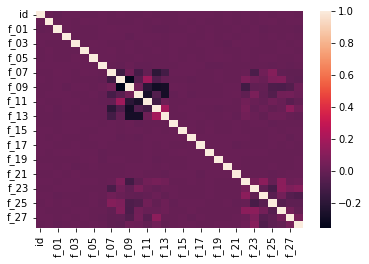

In [38]:
import seaborn as sns
sns.heatmap(corr)

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

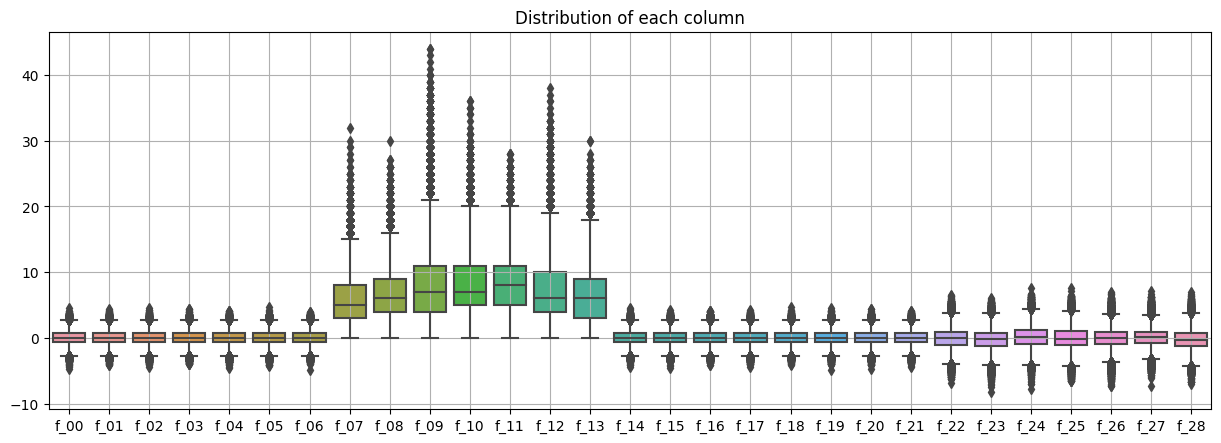

In [40]:
#General Visualization
#Let's take a look at the general spread of the data in each column of our dataset.
T1 = tabular_data.drop(columns='id')
plt.figure(dpi=100, figsize=(15, 5))
sns.boxplot(data=T1)
plt.grid(True)
plt.title("Distribution of each column")
plt.show()

In [41]:
T1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

There are 3 main groupings here:

00-06, float data

07-14. int data,

15-21, float data :- Similar to 00-06.
    
22-28, float data :- Spread is wider than the other float data categories

PCA - Principle Component Analysis

The Yeo-Johnson tranformation  improves the normality of data, so I will go with that.

In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
T_tran = pt.fit_transform(T1)

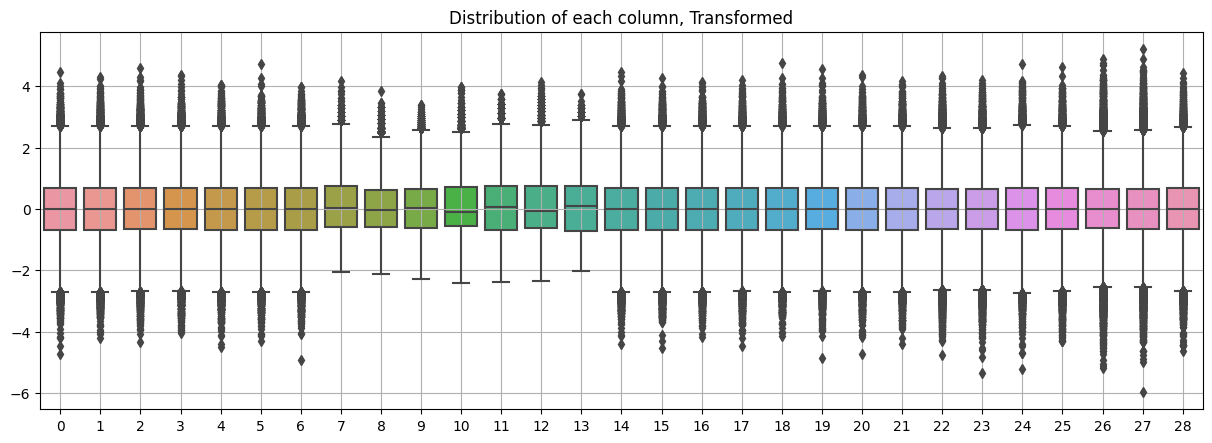

In [43]:
# Visualize the tranformed data
plt.figure(dpi=100, figsize=(15, 5))
sns.boxplot(data=T_tran)
plt.grid(True)
plt.title("Distribution of each column, Transformed")
plt.show()

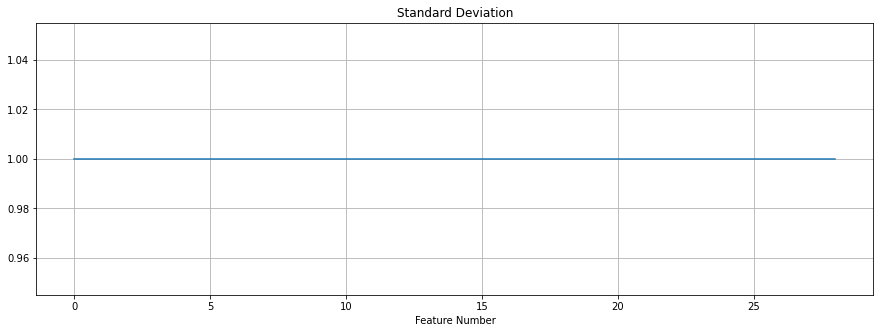

In [44]:
# Verify that the standard deviation of the tranformed data is consistent.
std = np.std(T_tran, axis=0)
fig, ax = plt.subplots(figsize=[15,5])
ax.plot(std)
ax.set_title("Standard Deviation")
ax.set_xlabel("Feature Number")
ax.grid(True)

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(T_tran)
var_ratio = pca.explained_variance_ratio_
exp_var = pca.explained_variance_
sing_vals = pca.singular_values_
components = pca.components_

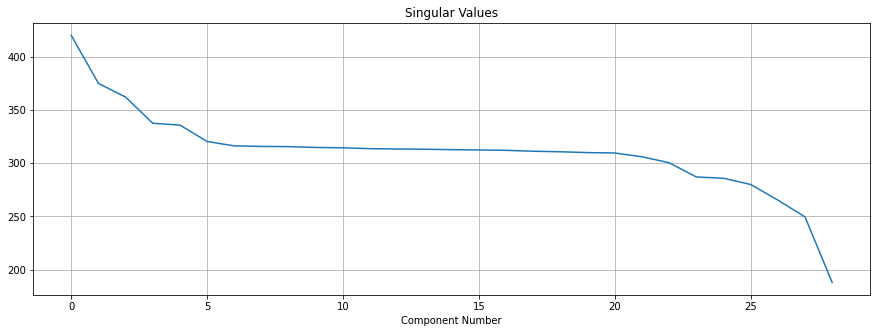

In [46]:
#Calculate singular values
#The singular values show the relative 'strength' of each component
fig, ax = plt.subplots(figsize=[15,5])
ax.plot(sing_vals)
ax.set_title("Singular Values")
ax.set_xlabel("Component Number")
ax.grid(True)

The first 6 components are the most informative.

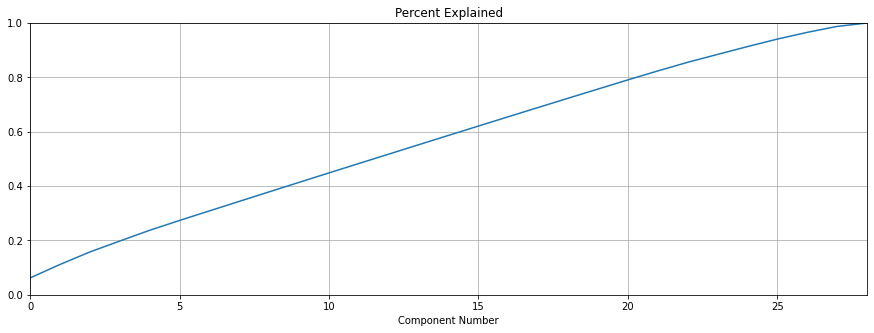

In [47]:
# Cumulative proportion of variance (from PC1 to PC6)   
percent_explained = np.cumsum(var_ratio)

fig, ax = plt.subplots(figsize=[15,5])
ax.plot(percent_explained)
ax.set_title("Percent Explained")
ax.set_xlabel("Component Number")
ax.set_xlim([0,28])
ax.set_ylim([0,1])
ax.grid(True)
plt.show()

In [48]:
#PCA on each group
# The group labels
g1 = [f"f_{x:02d}" for x in range(7)]
g2 = [f"f_{x:02d}" for x in range(7, 14)]
g3 = [f"f_{x:02d}" for x in range(14, 22)]
g4 = [f"f_{x:02d}" for x in range(22, 29)]
g_label_list = [g1, g2, g3, g4]

# The group data
tabular_data_g1 = T1[g1].copy()
tabular_data_g2 = T1[g2].copy()
tabular_data_g3 = tabular_data[g3].copy()
tabular_data_g4 = T1[g4].copy()
g_data = [tabular_data_g1, tabular_data_g2, tabular_data_g3, tabular_data_g4]

In [49]:
# Initialize Storage
var_ratios = []
exp_vars = []
sing_val_list = []
comp_list = []
projections = []

# Loop through groups
for data in g_data:
    pca = PCA()
    projection = pca.fit_transform(data)
    projections.append(projection)
    var_ratios.append(pca.explained_variance_ratio_)
    exp_vars.append(pca.explained_variance_)
    sing_val_list.append(pca.singular_values_)
    comp_list.append(pca.components_)

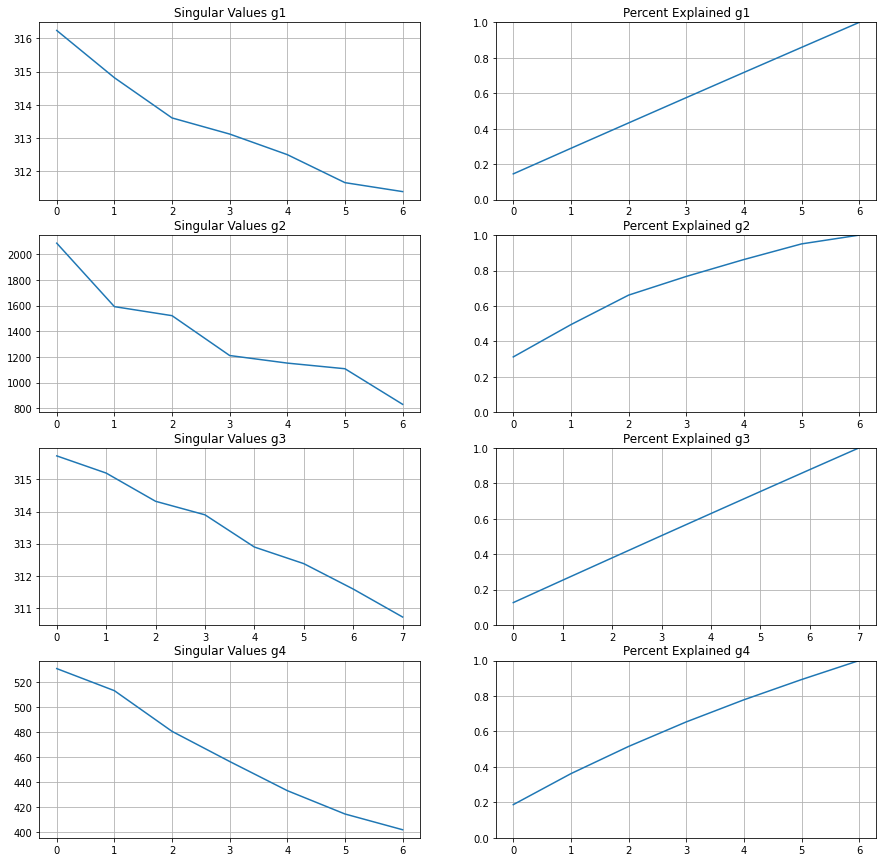

In [50]:
# Singular Value Plots
fig, ax = plt.subplots(nrows=len(g_label_list), ncols=2, figsize=[15,15])
group_names = ['g1', 'g2', 'g3', 'g4']

for idx, label in enumerate(group_names):
    ax[idx,0].plot(sing_val_list[idx])
    ax[idx,0].set_title(f"Singular Values {label}")
    ax[idx,0].grid(True)
    
    percent_explained = np.cumsum(var_ratios[idx])
    ax[idx,1].plot(percent_explained)
    ax[idx,1].set_title(f"Percent Explained {label}")
    ax[idx,1].set_ylim([0,1])
    ax[idx,1].grid(True)

plt.show()

t-SNE : t-Distributed Stochastic Neighbor Embedding

In [51]:
from sklearn.manifold import TSNE
T2 = T1.sample(frac=.10, random_state=0)

In [52]:
perplexities = [5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
embeddings = []
for perplexity in perplexities:
    tsne = TSNE(n_components=2, learning_rate='auto', perplexity=perplexity, verbose=1)
    X_embedded = tsne.fit_transform(T2)
    embeddings.append(X_embedded)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 9800 samples in 0.000s...
[t-SNE] Computed neighbors for 9800 samples in 2.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 1.983952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.254074
[t-SNE] KL divergence after 1000 iterations: 2.669434
[t-SNE] Computing 31 nearest neighbor

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 9800 samples in 2.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 2.381000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.270081
[t-SNE] KL divergence after 1000 iterations: 2.797771
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 9800 samples in 0.000s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 9800 samples in 2.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 2.722398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.947914
[t-SNE] KL divergence after 1000 iterations: 2.760934
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9800 samples in 0.000s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 9800 samples in 2.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 2.911853
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.087105
[t-SNE] KL divergence after 1000 iterations: 2.725967
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9800 samples in 0.000s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 9800 samples in 2.333s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 3.045577
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.459213
[t-SNE] KL divergence after 1000 iterations: 2.663300
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9800 samples in 0.000s...


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 9800 samples in 2.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9800
[t-SNE] Computed conditional probabilities for sample 2000 / 9800
[t-SNE] Computed conditional probabilities for sample 3000 / 9800
[t-SNE] Computed conditional probabilities for sample 4000 / 9800
[t-SNE] Computed conditional probabilities for sample 5000 / 9800
[t-SNE] Computed conditional probabilities for sample 6000 / 9800
[t-SNE] Computed conditional probabilities for sample 7000 / 9800
[t-SNE] Computed conditional probabilities for sample 8000 / 9800
[t-SNE] Computed conditional probabilities for sample 9000 / 9800
[t-SNE] Computed conditional probabilities for sample 9800 / 9800
[t-SNE] Mean sigma: 3.150233
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.058456
[t-SNE] KL divergence after 1000 iterations: 2.590412


 t-sne doesn't look like it's giving great results

UMAP

In [53]:
import umap

In [54]:
neighbor_size = [5.0, 50.0, 100.0, 500.0]
umap_embeds = []
for n_neighbors in neighbor_size:
     reducer = umap.UMAP(random_state=0, n_neighbors=n_neighbors, n_components=2, verbose=True)
    
# Fit the umap enbedding with the PowerTransformer normalized data
     X_embed = reducer.fit_transform(T_tran)
     umap_embeds.append(X_embed)
        

UMAP(n_neighbors=5.0, random_state=0, verbose=True)
Fri Jul 29 13:01:49 2022 Construct fuzzy simplicial set
Fri Jul 29 13:01:49 2022 Finding Nearest Neighbors
Fri Jul 29 13:01:49 2022 Building RP forest with 21 trees
Fri Jul 29 13:01:54 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	Stopping threshold met -- exiting after 9 iterations
Fri Jul 29 13:02:12 2022 Finished Nearest Neighbor Search
Fri Jul 29 13:02:16 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Jul 29 13:03:14 2022 Finished embedding
UMAP(n_neighbors=50.0, random_state=0, verbose=True)
Fri Jul 29 13:03:14 2022 Construct fuzzy simplicial set
Fri Jul 29 13:03:15 2022 Finding Nearest Neighbors
Fri Jul 29 13:03:15 2022 Building RP forest with 21 trees
Fri Jul 29 13:03:17 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	Stopping threshold met -- exiting after 5 iterations
Fri Jul 29 13:03:44 2022 Finished Nearest Neighbor Search
Fri Jul 29 13:03:46 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Jul 29 13:06:45 2022 Finished embedding
UMAP(n_neighbors=100.0, random_state=0, verbose=True)
Fri Jul 29 13:06:45 2022 Construct fuzzy simplicial set
Fri Jul 29 13:06:45 2022 Finding Nearest Neighbors
Fri Jul 29 13:06:45 2022 Building RP forest with 21 trees
Fri Jul 29 13:06:46 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	Stopping threshold met -- exiting after 5 iterations
Fri Jul 29 13:07:45 2022 Finished Nearest Neighbor Search
Fri Jul 29 13:07:50 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Jul 29 13:11:30 2022 Finished embedding
UMAP(n_neighbors=500.0, random_state=0, verbose=True)
Fri Jul 29 13:11:30 2022 Construct fuzzy simplicial set
Fri Jul 29 13:11:30 2022 Finding Nearest Neighbors
Fri Jul 29 13:11:30 2022 Building RP forest with 21 trees
Fri Jul 29 13:11:31 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	Stopping threshold met -- exiting after 9 iterations
Fri Jul 29 13:18:16 2022 Finished Nearest Neighbor Search
Fri Jul 29 13:18:44 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Jul 29 13:25:21 2022 Finished embedding


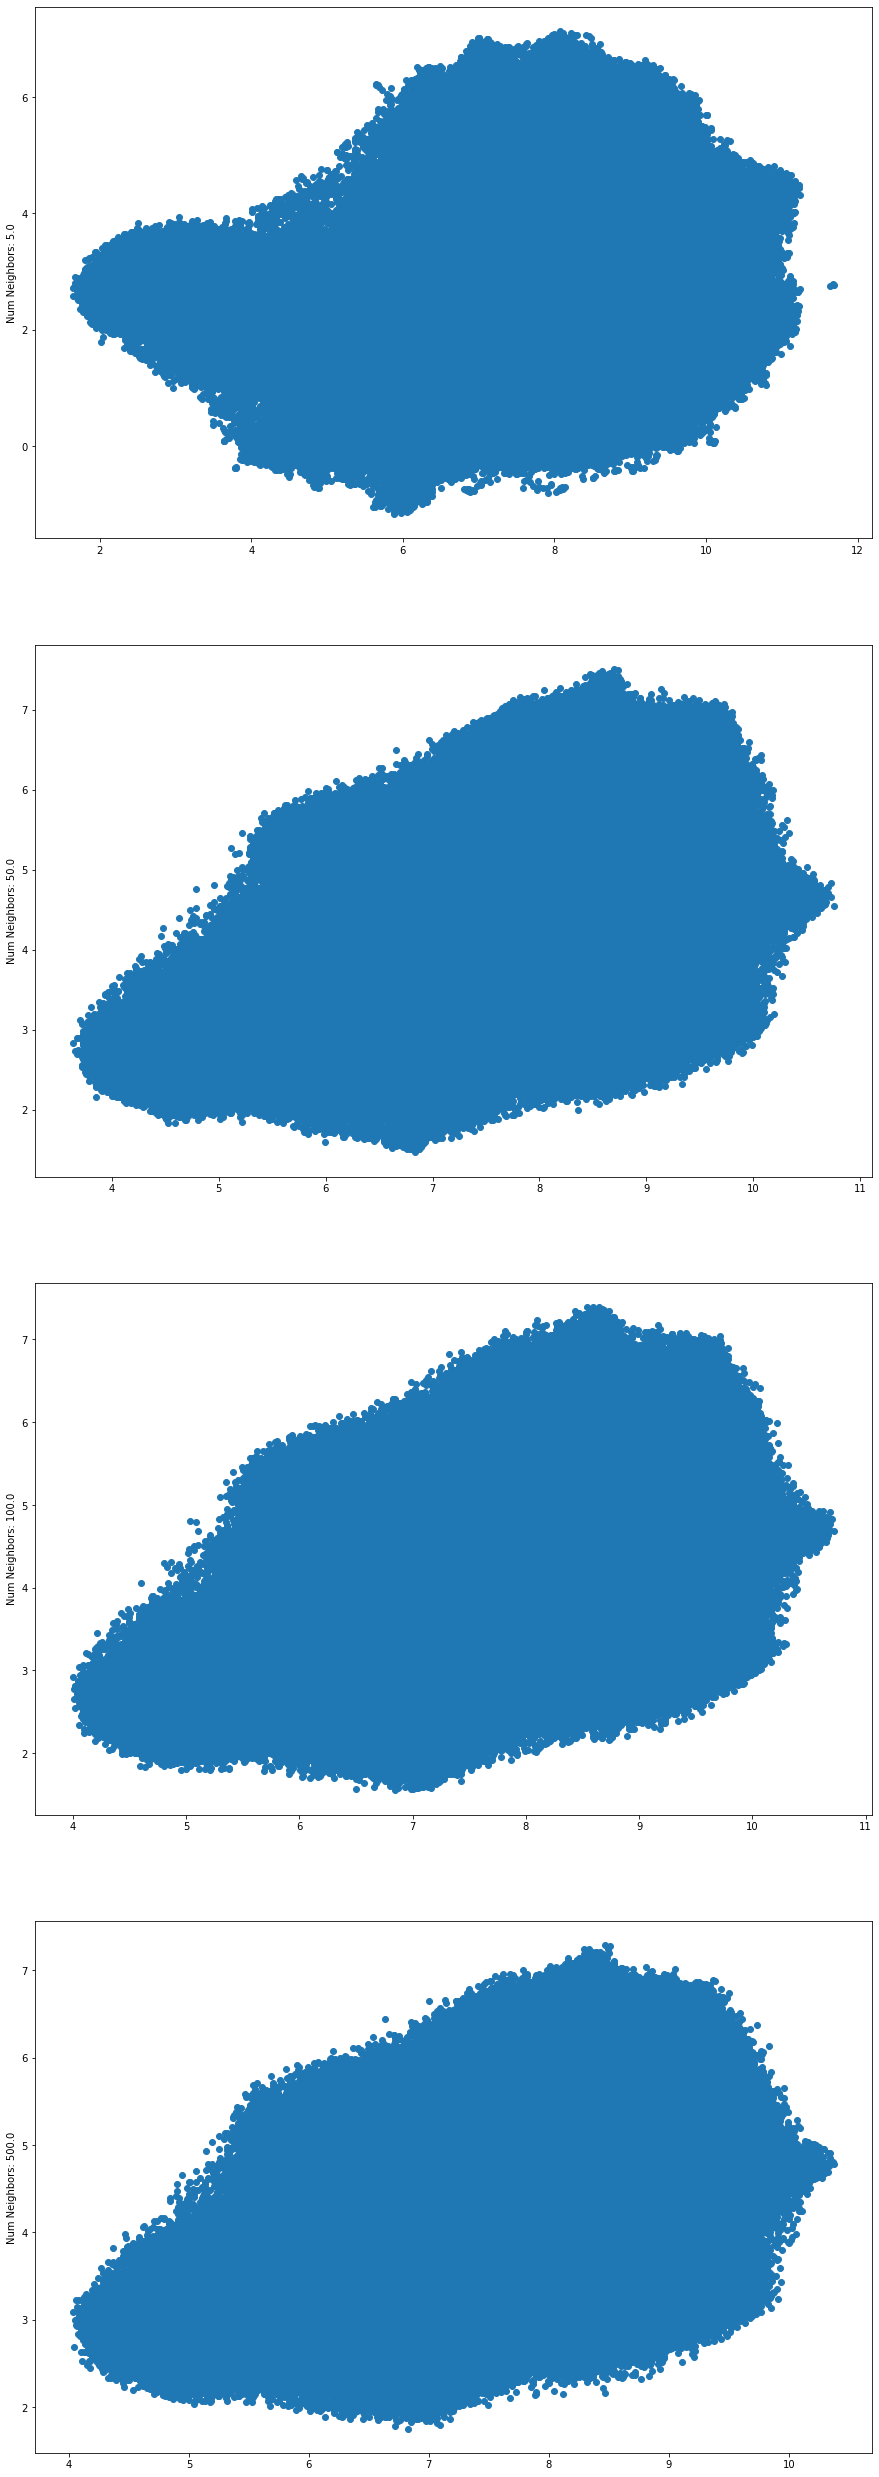

In [55]:
fig, ax = plt.subplots(ncols=1, nrows=len(neighbor_size), figsize=[15,45])    
for idx, n_neighbors in enumerate(neighbor_size):
            x = umap_embeds[idx][:,0]
            y = umap_embeds[idx][:,1]
            ax[idx].scatter(x,y)
            ax[idx].set_ylabel(f"Num Neighbors: {n_neighbors}")

plt.show()

Clustering - Gaussian Mixture Model

In [56]:
# Set number of components
num_comps = 6

# Grab components from PCA
pca = PCA(n_components=num_comps)
pca_array = pca.fit_transform(T_tran)
pca_df = pd.DataFrame(pca_array)

In [57]:
from sklearn.mixture import GaussianMixture

# # Intialize the GMM model
gmm = GaussianMixture(n_components = num_comps, random_state=0)

# Fit the GMM model for the dataset
gmm.fit(pca_df)

# # Assign a label to each sample
labels = gmm.predict(pca_df)
pca_df['Clusters']= labels

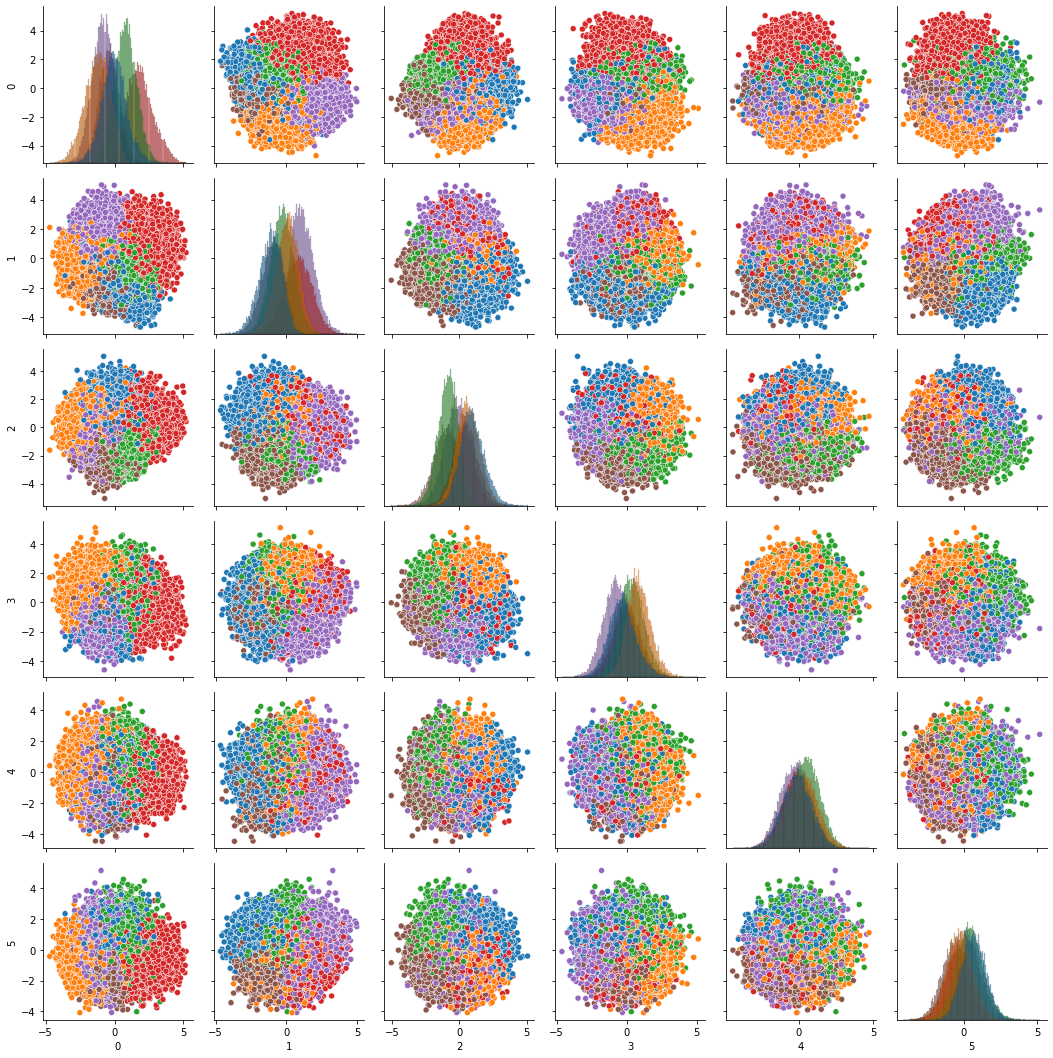

In [58]:
# # Visualize the clusters and their distributions
g = sns.PairGrid(pca_df, vars=list(range(num_comps)), hue="Clusters", palette="tab10")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [59]:
# Prep for submission
submission = pd.DataFrame()
submission['id'] = pca_df.index
submission['Predicted'] = pca_df.loc[:,['Clusters']]
submission.shape

(98000, 2)

In [60]:
# Save for submitting
submission.to_csv('submission.csv',index=False)